In [164]:
import pandas as pd

num_img_training = 1000 # 202599
#root= "/content/drive/My Drive/Colab Notebooks/Exam2/"
df = pd.read_csv("celeba-dataset/list_attr_celeba.csv")
df = df.iloc[:num_img_training,:41]
df = df.replace([-1],0)
df

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,0,1,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
1,000002.jpg,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,000003.jpg,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,000004.jpg,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
4,000005.jpg,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,000996.jpg,0,1,0,0,0,1,0,0,0,...,0,1,0,0,1,0,1,1,0,0
996,000997.jpg,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
997,000998.jpg,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
998,000999.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
from keras_preprocessing.image import ImageDataGenerator

columns = list(df.iloc[:num_img_training,1:41].columns)
train_dir = "G:\\Alpha_Projects\\AI\\Exam\\celeba-dataset\\img_align_celeba"


datagen=ImageDataGenerator(rescale=1./255.,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,
                             shear_range=0.2,zoom_range=0.5,horizontal_flip=True, fill_mode='nearest')
test_datagen=ImageDataGenerator(rescale=1./255.)

train_div = int(num_img_training*0.7)
test_div  = int(num_img_training*0.9)

train_generator=datagen.flow_from_dataframe(
dataframe=df[:train_div],
directory=train_dir,
validate_filenames=True,
x_col="image_id",
y_col=columns,
batch_size=32,
seed=42,
shuffle=True,
class_mode="raw",
target_size=(178,218))

valid_generator=test_datagen.flow_from_dataframe(
dataframe=df[train_div:test_div],
directory=train_dir,
validate_filenames=True,
x_col="image_id",
y_col=columns,
batch_size=32,
seed=42,
shuffle=True,
class_mode="raw",
target_size=(178,218))

test_generator=test_datagen.flow_from_dataframe(
dataframe=df[test_div:],
directory=train_dir,
validate_filenames=True,
x_col="image_id",
batch_size=1,
seed=42,
shuffle=False,
class_mode=None,
target_size=(178,218))

Found 700 validated image filenames.
Found 200 validated image filenames.
Found 100 validated image filenames.


In [112]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Input
from keras import regularizers, optimizers

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(178,218,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(40, activation='sigmoid'))
model.compile(optimizers.RMSprop(lr=0.0001, decay=1e-6),loss="binary_crossentropy",metrics=["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 178, 218, 32)      896       
_________________________________________________________________
activation_10 (Activation)   (None, 178, 218, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 176, 216, 32)      9248      
_________________________________________________________________
activation_11 (Activation)   (None, 176, 216, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 88, 108, 32)       0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 88, 108, 32)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 88, 108, 64)      

In [117]:
from keras.callbacks import ModelCheckpoint

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

checkpointer = ModelCheckpoint(filepath="celeba_model1.h5",monitor='val_accuracy',verbose=0, save_best_only=True,mode='max', period=1)

h=model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10
)

Epoch 1/10
21/21 [==============================] - 7s 314ms/step - loss: 0.4397 - accuracy: 0.0030 - val_loss: 0.4447 - val_accuracy: 0.0000e+00
Epoch 2/10
21/21 [==============================] - 7s 316ms/step - loss: 0.4399 - accuracy: 0.0045 - val_loss: 0.4366 - val_accuracy: 0.0000e+00
Epoch 3/10
21/21 [==============================] - 7s 320ms/step - loss: 0.4365 - accuracy: 0.0030 - val_loss: 0.4442 - val_accuracy: 0.0000e+00
Epoch 4/10
21/21 [==============================] - 7s 328ms/step - loss: 0.4323 - accuracy: 0.0045 - val_loss: 0.4284 - val_accuracy: 0.0000e+00
Epoch 5/10
21/21 [==============================] - 7s 334ms/step - loss: 0.4347 - accuracy: 0.0075 - val_loss: 0.4378 - val_accuracy: 0.0000e+00
Epoch 6/10
21/21 [==============================] - 7s 318ms/step - loss: 0.4292 - accuracy: 0.0000e+00 - val_loss: 0.4360 - val_accuracy: 0.0000e+00
Epoch 7/10
21/21 [==============================] - 7s 333ms/step - loss: 0.4296 - accuracy: 0.0015 - val_loss: 0.4406 -

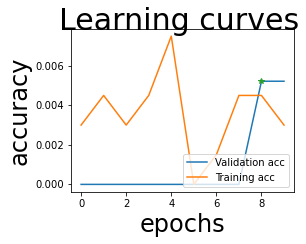

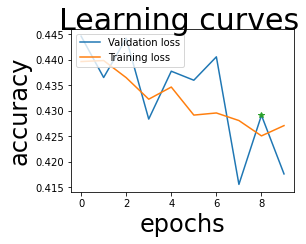

In [120]:
import numpy as np
import matplotlib.pyplot as plt

epoch_max = np.argmax(h.history['val_accuracy'])
plt.figure(num=None, figsize=(4,3))
plt.plot(h.history['val_accuracy'], label='Validation acc')
plt.plot(h.history['accuracy'], label='Training acc')
plt.legend(loc='lower right')
plt.plot(epoch_max, h.history['val_accuracy'][epoch_max],'*')
plt.xlabel('epochs',fontsize=24)
plt.ylabel('accuracy',fontsize=24)
plt.suptitle('Learning curves', fontsize=30)

plt.figure(num=None, figsize=(4,3))
plt.plot(h.history['val_loss'], label='Validation loss')
plt.plot(h.history['loss'], label='Training loss')
plt.legend(loc='upper left')
plt.plot(epoch_max, h.history['val_loss'][epoch_max],'*')
plt.xlabel('epochs',fontsize=24)
plt.ylabel('accuracy',fontsize=24)
plt.suptitle('Learning curves', fontsize=30)

plt.show()

In [121]:
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

100/100 [==============================] - 1s 11ms/step


In [122]:
pred_bool = (pred >0.5)

predictions = pred_bool.astype(int)
#columns=["desert", "mountains", "sea", "sunset", "trees"]
#columns should be the same order of y_col
results=pd.DataFrame(predictions, columns=columns)
results["image_id"]=test_generator.filenames
ordered_cols=["image_id"]+columns
results=results[ordered_cols]#To get the same column order
results.to_csv("results.csv",index=False)

In [127]:
import keras
from keras.models import Model
from keras.layers import Conv2D, Flatten, Dense, Activation, MaxPooling2D, Dropout, Input, BatchNormalization

inp = Input(shape = (178,218,3))
x = Conv2D(32, (3, 3), padding = 'same')(inp)
x = Activation('relu')(x)
x = Conv2D(32, (3, 3))(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size = (2, 2))(x)
x = Dropout(0.25)(x)
x = Conv2D(64, (3, 3), padding = 'same')(x)
x = Activation('relu')(x)
x = Conv2D(64, (3, 3))(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size = (2, 2))(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
x = Dense(512)(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
output1 = Dense(1, activation = 'sigmoid')(x)
output2 = Dense(1, activation = 'sigmoid')(x)
output3 = Dense(1, activation = 'sigmoid')(x)
output4 = Dense(1, activation = 'sigmoid')(x)
output5 = Dense(1, activation = 'sigmoid')(x)
output6 = Dense(1, activation = 'sigmoid')(x)
output7 = Dense(1, activation = 'sigmoid')(x)
output8 = Dense(1, activation = 'sigmoid')(x)
output9 = Dense(1, activation = 'sigmoid')(x)
output10 = Dense(1, activation = 'sigmoid')(x)
output11 = Dense(1, activation = 'sigmoid')(x)
output12 = Dense(1, activation = 'sigmoid')(x)
output13 = Dense(1, activation = 'sigmoid')(x)
output14 = Dense(1, activation = 'sigmoid')(x)
output15 = Dense(1, activation = 'sigmoid')(x)
output16 = Dense(1, activation = 'sigmoid')(x)
output17 = Dense(1, activation = 'sigmoid')(x)
output18 = Dense(1, activation = 'sigmoid')(x)
output19 = Dense(1, activation = 'sigmoid')(x)
output20 = Dense(1, activation = 'sigmoid')(x)
output21 = Dense(1, activation = 'sigmoid')(x)
output22 = Dense(1, activation = 'sigmoid')(x)
output23 = Dense(1, activation = 'sigmoid')(x)
output24 = Dense(1, activation = 'sigmoid')(x)
output25 = Dense(1, activation = 'sigmoid')(x)
output26 = Dense(1, activation = 'sigmoid')(x)
output27 = Dense(1, activation = 'sigmoid')(x)
output28 = Dense(1, activation = 'sigmoid')(x)
output29 = Dense(1, activation = 'sigmoid')(x)
output30 = Dense(1, activation = 'sigmoid')(x)
output31 = Dense(1, activation = 'sigmoid')(x)
output32 = Dense(1, activation = 'sigmoid')(x)
output33 = Dense(1, activation = 'sigmoid')(x)
output34 = Dense(1, activation = 'sigmoid')(x)
output35 = Dense(1, activation = 'sigmoid')(x)
output36 = Dense(1, activation = 'sigmoid')(x)
output37 = Dense(1, activation = 'sigmoid')(x)
output38 = Dense(1, activation = 'sigmoid')(x)
output39 = Dense(1, activation = 'sigmoid')(x)
output40 = Dense(1, activation = 'sigmoid')(x)
#model = Model(inp,[output1,output2,output3,output4,output5])
model = Model(inp,[output1,output2,output3,output4,output5,output6, output7, output8, output9, output10,
                   output11,output12,output13,output14,output15,output16,output17,output18,output19,output20,
                   output21,output22,output23,output24,output25,output26,output27,output28,output29,output30,
                   output31,output32,output33,output34,output35,output36,output37,output38,output39,output40])
model.compile(optimizers.RMSprop(lr = 0.0001, decay = 1e-6),
loss = ["binary_crossentropy","binary_crossentropy","binary_crossentropy","binary_crossentropy",
        "binary_crossentropy","binary_crossentropy","binary_crossentropy","binary_crossentropy",
        "binary_crossentropy","binary_crossentropy","binary_crossentropy","binary_crossentropy",
        "binary_crossentropy","binary_crossentropy","binary_crossentropy","binary_crossentropy",
        "binary_crossentropy","binary_crossentropy","binary_crossentropy","binary_crossentropy",
        "binary_crossentropy","binary_crossentropy","binary_crossentropy","binary_crossentropy",
        "binary_crossentropy","binary_crossentropy","binary_crossentropy","binary_crossentropy",
        "binary_crossentropy","binary_crossentropy","binary_crossentropy","binary_crossentropy",
        "binary_crossentropy","binary_crossentropy","binary_crossentropy","binary_crossentropy",
        "binary_crossentropy","binary_crossentropy","binary_crossentropy","binary_crossentropy"],metrics = ["accuracy"])

In [128]:
def generator_wrapper(generator):
    for batch_x,batch_y in generator:
        yield (batch_x,[batch_y[:,i] for i in range(40)])

In [129]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

checkpointer = ModelCheckpoint(filepath="test_celeba_model2.h5",monitor='val_accuracy',verbose=0, save_best_only=True,mode='max', period=1)

h = model.fit_generator(generator=generator_wrapper(train_generator),
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=10)
validation_data=generator_wrapper(valid_generator)#,
                    #validation_steps=STEP_SIZE_VALID,
                    #epochs=1,verbose=2)

Epoch 1/10
21/21 [==============================] - 7s 323ms/step - loss: 20.3722 - dense_87_loss: 0.4767 - dense_88_loss: 0.7057 - dense_89_loss: 0.7582 - dense_90_loss: 0.5930 - dense_91_loss: 0.2175 - dense_92_loss: 0.5214 - dense_93_loss: 0.6261 - dense_94_loss: 0.6228 - dense_95_loss: 0.6530 - dense_96_loss: 0.5217 - dense_97_loss: 0.2845 - dense_98_loss: 0.5736 - dense_99_loss: 0.5113 - dense_100_loss: 0.3432 - dense_101_loss: 0.2520 - dense_102_loss: 0.3341 - dense_103_loss: 0.2923 - dense_104_loss: 0.2880 - dense_105_loss: 0.7284 - dense_106_loss: 0.7826 - dense_107_loss: 0.7719 - dense_108_loss: 0.7440 - dense_109_loss: 0.2156 - dense_110_loss: 0.4561 - dense_111_loss: 0.5738 - dense_112_loss: 0.6171 - dense_113_loss: 0.2502 - dense_114_loss: 0.6530 - dense_115_loss: 0.3339 - dense_116_loss: 0.2980 - dense_117_loss: 0.3396 - dense_118_loss: 0.7636 - dense_119_loss: 0.6091 - dense_120_loss: 0.6445 - dense_121_loss: 0.5820 - dense_122_loss: 0.2569 - dense_123_loss: 0.7304 - dens

21/21 [==============================] - 7s 333ms/step - loss: 18.5616 - dense_87_loss: 0.4209 - dense_88_loss: 0.6504 - dense_89_loss: 0.7406 - dense_90_loss: 0.5485 - dense_91_loss: 0.1381 - dense_92_loss: 0.4303 - dense_93_loss: 0.6153 - dense_94_loss: 0.6076 - dense_95_loss: 0.6083 - dense_96_loss: 0.4194 - dense_97_loss: 0.2101 - dense_98_loss: 0.5418 - dense_99_loss: 0.4507 - dense_100_loss: 0.2895 - dense_101_loss: 0.2186 - dense_102_loss: 0.2643 - dense_103_loss: 0.2577 - dense_104_loss: 0.2207 - dense_105_loss: 0.6776 - dense_106_loss: 0.7555 - dense_107_loss: 0.6912 - dense_108_loss: 0.7279 - dense_109_loss: 0.1612 - dense_110_loss: 0.3928 - dense_111_loss: 0.5239 - dense_112_loss: 0.5955 - dense_113_loss: 0.2062 - dense_114_loss: 0.6530 - dense_115_loss: 0.2823 - dense_116_loss: 0.2813 - dense_117_loss: 0.2644 - dense_118_loss: 0.7300 - dense_119_loss: 0.5594 - dense_120_loss: 0.6232 - dense_121_loss: 0.5658 - dense_122_loss: 0.2226 - dense_123_loss: 0.7073 - dense_124_loss:

21/21 [==============================] - 7s 329ms/step - loss: 18.0269 - dense_87_loss: 0.3805 - dense_88_loss: 0.6399 - dense_89_loss: 0.7231 - dense_90_loss: 0.5434 - dense_91_loss: 0.1250 - dense_92_loss: 0.4434 - dense_93_loss: 0.6024 - dense_94_loss: 0.5575 - dense_95_loss: 0.5726 - dense_96_loss: 0.3966 - dense_97_loss: 0.1921 - dense_98_loss: 0.5330 - dense_99_loss: 0.4346 - dense_100_loss: 0.2662 - dense_101_loss: 0.1971 - dense_102_loss: 0.2631 - dense_103_loss: 0.2290 - dense_104_loss: 0.2070 - dense_105_loss: 0.6648 - dense_106_loss: 0.7315 - dense_107_loss: 0.6510 - dense_108_loss: 0.7312 - dense_109_loss: 0.1500 - dense_110_loss: 0.4113 - dense_111_loss: 0.4956 - dense_112_loss: 0.6065 - dense_113_loss: 0.1961 - dense_114_loss: 0.6590 - dense_115_loss: 0.2930 - dense_116_loss: 0.2743 - dense_117_loss: 0.2221 - dense_118_loss: 0.7316 - dense_119_loss: 0.5635 - dense_120_loss: 0.6132 - dense_121_loss: 0.5538 - dense_122_loss: 0.2467 - dense_123_loss: 0.6818 - dense_124_loss:

21/21 [==============================] - 7s 327ms/step - loss: 17.6497 - dense_87_loss: 0.4021 - dense_88_loss: 0.6111 - dense_89_loss: 0.6980 - dense_90_loss: 0.5313 - dense_91_loss: 0.1056 - dense_92_loss: 0.4228 - dense_93_loss: 0.5941 - dense_94_loss: 0.5754 - dense_95_loss: 0.6258 - dense_96_loss: 0.3629 - dense_97_loss: 0.1871 - dense_98_loss: 0.5099 - dense_99_loss: 0.4516 - dense_100_loss: 0.2531 - dense_101_loss: 0.1604 - dense_102_loss: 0.2491 - dense_103_loss: 0.2477 - dense_104_loss: 0.1881 - dense_105_loss: 0.6293 - dense_106_loss: 0.7244 - dense_107_loss: 0.6283 - dense_108_loss: 0.7115 - dense_109_loss: 0.1402 - dense_110_loss: 0.4022 - dense_111_loss: 0.5111 - dense_112_loss: 0.6049 - dense_113_loss: 0.1972 - dense_114_loss: 0.6201 - dense_115_loss: 0.2698 - dense_116_loss: 0.2621 - dense_117_loss: 0.2646 - dense_118_loss: 0.6930 - dense_119_loss: 0.5631 - dense_120_loss: 0.6067 - dense_121_loss: 0.5105 - dense_122_loss: 0.2369 - dense_123_loss: 0.6657 - dense_124_loss:

KeyError: 'accuracy'

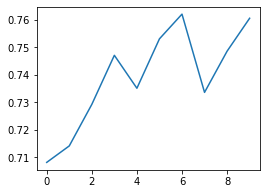

In [133]:
epoch_max = np.argmax(h.history['dense_126_accuracy'])
plt.figure(num=None, figsize=(4,3))
plt.plot(h.history['dense_126_accuracy'], label='Validation acc')
plt.plot(h.history['accuracy'], label='Training acc')
plt.legend(loc='lower right')
plt.plot(epoch_max, h.history['dense_126_accuracy'][epoch_max],'*')
plt.xlabel('epochs',fontsize=24)
plt.ylabel('accuracy',fontsize=24)
plt.suptitle('Learning curves', fontsize=30)

plt.figure(num=None, figsize=(4,3))
plt.plot(h.history['val_loss'], label='Validation loss')
plt.plot(h.history['loss'], label='Training loss')
plt.legend(loc='upper left')
plt.plot(epoch_max, h.history['val_loss'][epoch_max],'*')
plt.xlabel('epochs',fontsize=24)
plt.ylabel('accuracy',fontsize=24)
plt.suptitle('Learning curves', fontsize=30)

plt.show()

In [136]:
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

100/100 [==============================] - 1s 9ms/step


In [143]:
import numpy as np

predictions = [(x > 0.5).astype(int) for x in pred]
predictions = np.reshape(predictions,(num_img_training-int(num_img_training*0.9), len(columns)))
#columns=["desert", "mountains", "sea", "sunset", "trees"]
#columns should be the same order of y_col
results2=pd.DataFrame(predictions, columns=columns)
results2["image_id"]=test_generator.filenames
ordered_cols=["image_id"]+columns
results2=results2[ordered_cols]#To get the same column order
results2.to_csv("results2.csv",index=False)

In [ ]:
#np.where(df.iloc[test_div:,1:41].reset_index(drop=True) == results2.iloc[:,1:41], 'True', 'False')

In [144]:
df = pd.read_csv("celeba-dataset/list_attr_celeba.csv")

df1=results["image_id"]
df2=results2["image_id"]
#for column in columns:
#    df1[column] = np.where(df[column] == results[column], 'True', 'False')
#    df2[column] = np.where(df[column] == results2[column], 'True', 'False')

In [13]:
#np.where(df.iloc[test_div:,1:41] == results2.iloc[:,1:41], 'True', 'False')

In [14]:
#np.where(df.iloc[column] == results[column], 'True', 'False')

In [15]:
#type(df["5_o_Clock_Shadow"])

In [148]:
df.iloc[test_div:num_img_training,1:41].reset_index(drop=True)

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,1,-1,-1,1
1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,...,1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,-1,-1,-1,1,-1,-1,-1,1,-1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,1,-1
3,1,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,-1,-1,-1,1,1,-1,-1,-1,-1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-1,1,-1,-1,-1,1,-1,-1,-1,1,...,-1,1,-1,-1,1,-1,1,1,-1,-1
96,-1,-1,1,-1,-1,1,-1,-1,-1,1,...,-1,-1,-1,-1,1,-1,1,-1,-1,-1
97,-1,1,1,-1,-1,-1,-1,-1,-1,1,...,-1,-1,-1,1,-1,-1,1,-1,-1,1
98,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [147]:
results2.iloc[:,1:41]

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
98,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [88]:
np.where(df.iloc[test_div:,1:41].reset_index(drop=True) == results.iloc[:,1:41], 'True', 'False')

array([['True', 'True', 'True', ..., 'True', 'True', 'True'],
       ['True', 'True', 'False', ..., 'True', 'False', 'False'],
       ['True', 'True', 'True', ..., 'True', 'True', 'True'],
       ...,
       ['True', 'True', 'True', ..., 'True', 'True', 'True'],
       ['True', 'True', 'True', ..., 'False', 'True', 'True'],
       ['True', 'True', 'True', ..., 'True', 'True', 'True']], dtype='<U5')

In [175]:
df.iloc[test_div:,1:41].reset_index(drop=True)

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,0,0,0,0,1,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,1,0,0,0,1,0,0,0,1,...,0,1,0,0,1,0,1,1,0,0
96,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
97,0,1,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
#df1[[columns]]=pd.DataFrame(np.where(df.iloc[test_div:,1:41].reset_index(drop=True) == results2.iloc[:,1:41], 'True', 'False'))

In [108]:
#pd.DataFrame(np.where(df.iloc[test_div:,1:41].reset_index(drop=True) == results2.iloc[:,1:41], 'True', 'False')).value_counts()

In [159]:
df1=pd.DataFrame(results["image_id"])
df2=pd.DataFrame(results2["image_id"])
#df=df.iloc[test_div:,1:41].reset_index(drop=True)
for column in columns:
    df1[column] = np.where(df.iloc[test_div:,1:41].reset_index(drop=True)[column] == results[column], 1, 0)
    df2[column] = np.where(df.iloc[test_div:,1:41].reset_index(drop=True)[column] == results2[column], 1, 0)

In [168]:
#for column in columns:
#    print(column)
#    print(df2[column].value_counts())
#    print("\n")
df1.sum()

image_id               000901.jpg000902.jpg000903.jpg000904.jpg000905...
5_o_Clock_Shadow                                                      88
Arched_Eyebrows                                                       84
Attractive                                                            61
Bags_Under_Eyes                                                       81
Bald                                                                  94
Bangs                                                                 81
Big_Lips                                                              86
Big_Nose                                                              78
Black_Hair                                                            84
Blond_Hair                                                            80
Blurry                                                                94
Brown_Hair                                                            81
Bushy_Eyebrows                                     

In [106]:
df1[["Chubby","Gray_Hair","Wearing_Necktie","Mustache","Bald","Double_Chin"]].sum()

Chubby             49
Gray_Hair          48
Wearing_Necktie    48
Mustache           47
Bald               50
Double_Chin        50
dtype: int64

In [202]:
df.iloc[test_div:,1:41].sum()

5_o_Clock_Shadow       12
Arched_Eyebrows        17
Attractive             46
Bags_Under_Eyes        19
Bald                    6
Bangs                  19
Big_Lips               14
Big_Nose               22
Black_Hair             18
Blond_Hair             20
Blurry                  6
Brown_Hair             19
Bushy_Eyebrows          6
Chubby                  6
Double_Chin             6
Eyeglasses             11
Goatee                  5
Gray_Hair               7
Heavy_Makeup           37
High_Cheekbones        44
Male                   45
Mouth_Slightly_Open    43
Mustache                7
Narrow_Eyes            12
No_Beard               81
Oval_Face              29
Pale_Skin               3
Pointy_Nose            28
Receding_Hairline      11
Rosy_Cheeks             3
Sideburns               7
Smiling                50
Straight_Hair          15
Wavy_Hair              28
Wearing_Earrings       17
Wearing_Hat             2
Wearing_Lipstick       46
Wearing_Necklace       14
Wearing_Neck

In [172]:
pred

[array([[0.2445656 ],
        [0.32014507],
        [0.2796906 ],
        [0.21825245],
        [0.25589073],
        [0.23548329],
        [0.28764585],
        [0.27435786],
        [0.2670446 ],
        [0.26165113],
        [0.2636176 ],
        [0.24395706],
        [0.24103974],
        [0.26712015],
        [0.34044516],
        [0.1855045 ],
        [0.2500095 ],
        [0.19261713],
        [0.21385984],
        [0.2531185 ],
        [0.27597347],
        [0.24578999],
        [0.21431242],
        [0.22414215],
        [0.23717317],
        [0.24099542],
        [0.22390574],
        [0.31866124],
        [0.27829242],
        [0.1644079 ],
        [0.2967316 ],
        [0.23844585],
        [0.2250009 ],
        [0.19194497],
        [0.28628457],
        [0.217932  ],
        [0.21058272],
        [0.30200633],
        [0.20519179],
        [0.2063102 ],
        [0.26042396],
        [0.2293893 ],
        [0.25642553],
        [0.26228324],
        [0.2346228 ],
        [0

In [186]:
from sklearn.metrics import multilabel_confusion_matrix

y_true = df.iloc[test_div:,1:41].reset_index(drop=True).values

multilabel_confusion_matrix(y_true, predictions, labels=columns)

TypeError: cannot perform reduce with flexible type

In [188]:
y_true

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 1, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 1]], dtype=int64)

In [178]:
len(pred)

40

In [180]:
np.reshape(df.iloc[test_div:,1:41].reset_index(drop=True).values,(40,100))

array([[0, 0, 0, ..., 1, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 1, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]], dtype=int64)

In [190]:
c = df.columns[(df.iloc[test_div:,1:41].reset_index(drop=True) > 0).all()]
print (c)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 41 but corresponding boolean dimension is 40

In [192]:
(df.iloc[0,1:41].reset_index(drop=True) > 0).all()

False

In [199]:
(df.iloc[test_div:,1:41].reset_index(drop=True).any())

5_o_Clock_Shadow       True
Arched_Eyebrows        True
Attractive             True
Bags_Under_Eyes        True
Bald                   True
Bangs                  True
Big_Lips               True
Big_Nose               True
Black_Hair             True
Blond_Hair             True
Blurry                 True
Brown_Hair             True
Bushy_Eyebrows         True
Chubby                 True
Double_Chin            True
Eyeglasses             True
Goatee                 True
Gray_Hair              True
Heavy_Makeup           True
High_Cheekbones        True
Male                   True
Mouth_Slightly_Open    True
Mustache               True
Narrow_Eyes            True
No_Beard               True
Oval_Face              True
Pale_Skin              True
Pointy_Nose            True
Receding_Hairline      True
Rosy_Cheeks            True
Sideburns              True
Smiling                True
Straight_Hair          True
Wavy_Hair              True
Wearing_Earrings       True
Wearing_Hat         